# Quantum Algorithm Speed-Ups
An overview of speed-ups from [Quantum Algorithm Zoo](https://quantumalgorithmzoo.org/).

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url = "https://quantumalgorithmzoo.org/"
response = requests.get(url)
content = response.content

parsed_content = BeautifulSoup(content, "html.parser")


def extract_algorithms_and_speedups(parsed):
    data = []
    current_section = None
    for element in parsed.find_all(["h2", "b"]):
        if element.name == "h2":
            current_section = element.get_text(strip=True)
        elif element.name == "b" and element.get_text(strip=True) == "Algorithm:":
            algorithm = element.find_next_sibling(string=True).strip()
            speedup_element = element.find_next("b", string="Speedup:")
            if speedup_element:
                speedup = speedup_element.find_next_sibling(string=True).strip()
                if current_section:
                    data.append([current_section, algorithm, speedup])
    return data


# Extract relevant data from the URL
algorithms_and_speedups = extract_algorithms_and_speedups(parsed_content)

In [2]:
# Clean up and simplification
speedups = pd.DataFrame(
    algorithms_and_speedups, columns=["category", "algorithm", "speedup_original"]
)

speedup_mapping = {
    "Constant factor": "constant",
    "Exponential": "exponential",
    "Exponential over P, none over BPP": "exponential",
    "Polynomial": "polynomial",
    "Polynomial (quartic)": "quartic",
    "Polynomial Directly, Superpolynomial Recursively": "(super)polynomial",
    "Superpolynomial": "superpolynomial",
    "Varies": "variable",
    "Various": "variable",
}

speedups["speedup"] = speedups["speedup_original"].replace(speedup_mapping)

In [3]:
# Map to quantum advantage
def set_advantage(speedup):
    if speedup in ["exponential", "quartic", "superpolynomial"]:
        return "yes"
    elif speedup in ["variable", "polynomial", "(super)polynomial"]:
        return "maybe"
    else:
        return "no"


speedups["advantage"] = speedups["speedup"].apply(set_advantage)

## Distribution of Speed-Ups

In [4]:
def get_percentages_by_cols(df, cols, sort=True):
    counts = df.groupby(cols).size()
    percentages = ((counts / counts.sum()) * 100).round(1)
    return (
        percentages.sort_values(ascending=False) if sort else percentages.sort_index()
    )

In [5]:
get_percentages_by_cols(speedups, ["speedup"])

speedup
superpolynomial      45.7
polynomial           41.4
variable              5.7
exponential           2.9
(super)polynomial     1.4
constant              1.4
quartic               1.4
dtype: float64

In [6]:
get_percentages_by_cols(speedups, ["advantage"])

advantage
yes      50.0
maybe    48.6
no        1.4
dtype: float64

In [7]:
get_percentages_by_cols(speedups, ["category"])

category
Oracular Algorithms                             44.3
Algebraic and Number Theoretic Algorithms       20.0
Optimization, Numerics, and Machine Learning    18.6
Approximation and Simulation Algorithms         17.1
dtype: float64

In [8]:
get_percentages_by_cols(speedups, ["category", "advantage"], False)

category                                      advantage
Algebraic and Number Theoretic Algorithms     maybe         8.6
                                              yes          11.4
Approximation and Simulation Algorithms       maybe         1.4
                                              yes          15.7
Optimization, Numerics, and Machine Learning  maybe        11.4
                                              yes           7.1
Oracular Algorithms                           maybe        27.1
                                              no            1.4
                                              yes          15.7
dtype: float64

In [9]:
get_percentages_by_cols(speedups, ["advantage", "category"], False)

advantage  category                                    
maybe      Algebraic and Number Theoretic Algorithms        8.6
           Approximation and Simulation Algorithms          1.4
           Optimization, Numerics, and Machine Learning    11.4
           Oracular Algorithms                             27.1
no         Oracular Algorithms                              1.4
yes        Algebraic and Number Theoretic Algorithms       11.4
           Approximation and Simulation Algorithms         15.7
           Optimization, Numerics, and Machine Learning     7.1
           Oracular Algorithms                             15.7
dtype: float64

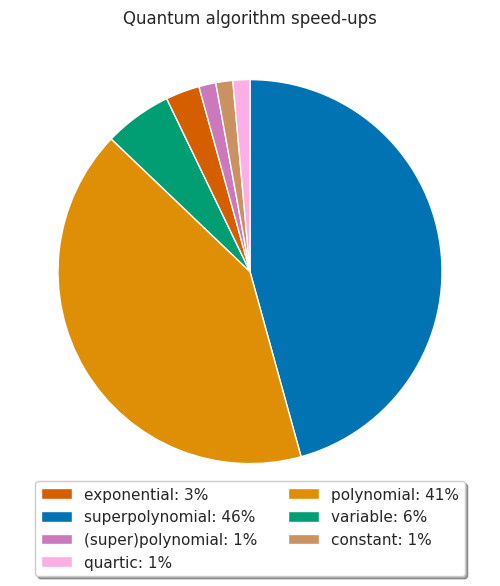

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

speedup_counts = speedups['speedup'].value_counts()
percentages = [f'{label}: {count / sum(speedup_counts) * 100:.0f}%' for label, count in zip(speedup_counts.index, speedup_counts)]

patches, _ = plt.pie(speedup_counts, colors=sns.color_palette("colorblind"), startangle=90, counterclock=False)

label_patch_map = {label: patch for label, patch in zip(speedup_counts.index, patches)}
label_percentage_map = {label: percentage for label, percentage in zip(speedup_counts.index, percentages)}
custom_order_labels = ['exponential', 'superpolynomial', '(super)polynomial', 'quartic', 'polynomial', 'variable', 'constant']
custom_patches = [label_patch_map[label] for label in custom_order_labels]
custom_percentages = [label_percentage_map[label] for label in custom_order_labels]

plt.legend(custom_patches, custom_percentages, loc="lower center", bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.title("Quantum algorithm speed-ups", fontsize=12)
plt.tight_layout()
plt.savefig("quantum-algorithm-speedups.png", dpi=300)

plt.show()

---
&copy; 2024 [Ian Hellström](https://ianhellstrom.org)